In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [57]:
data_path =  Path('breast-cancer-wisconsin.data')
data  = pd.read_csv(data_path)
data.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [58]:
headers = ['id','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion'
           ,'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

In [59]:
data = pd.read_csv(data_path,names=headers)
data.head()

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [60]:
data['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [61]:
data['Class'] = data['Class'].map({2:0 , 4:1})

In [62]:
data['Class'].value_counts()

0    458
1    241
Name: Class, dtype: int64

In [63]:
data.isnull().sum()

id                             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [64]:
data['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [65]:
data['Bare Nuclei'] = data['Bare Nuclei'].replace('?','1')

In [66]:
data = data.astype('int64')

In [67]:
data.drop(columns='id',inplace=True)

In [68]:
from sklearn.preprocessing import StandardScaler
x = data.drop(columns= 'Class')
y = data["Class"].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# NEURAL NETWORK

In [69]:
layers = [9,2,1]
learning_rate = 0.001
np.random.seed(3)
params = {}
params['W1'] =  np.random.randn(layers[0],layers[1])
params['W2'] = np.random.randn(layers[1],layers[2])
params['b1'] = np.random.rand(layers[1])
params['b2'] = np.random.rand(layers[2])

In [70]:
##Activaton function
def relu(z):
    return np.maximum(0,z)

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
##Loss Function
def binary_cross_entropy(y,y_hat):
    loss = -1/len(y) * (np.sum(np.multiply(np.log(y_hat),y) + np.multiply((1-y),np.log(1-y_hat)))) 
    return loss
x = x_train
y = y_train

# Foward and Backward Propagation

In [71]:
iterations = 150
loss_list = []
for i in range(iterations):
    z1 = x.dot(params['W1'])+ params['b1']
    A1 = relu(z1)
    z2 = A1.dot(params['W2'])+ params['b2']
    y_hat= sigmoid(z2)
    loss  = binary_cross_entropy(y,y_hat)
    loss_list.append(loss)


# Backward propagation

    dl_wrt_y_hat = -(np.divide(y,y_hat) - np.divide((1-y),(1-y_hat)))
    dl_wrt_z2 = dl_wrt_y_hat * (y_hat * (1-y_hat)) 
    dl_wrt_A1 = dl_wrt_z2.dot(params['W2'].T)
    dl_wrt_w2 = A1.T.dot(dl_wrt_z2)
    dl_wrt_b2 = np.sum(dl_wrt_z2)

    def drelu(x):
        x[x<=0] = 0
        x[x>0]  = 1
        return x

    dl_wrt_z1 = dl_wrt_A1 * drelu(z1)
    dl_wrt_w1 = x.T.dot(dl_wrt_z1)
    dl_wrt_b1 = np.sum(dl_wrt_z1,axis=0)


    #update weights and biases
    params['W1'] = params['W1'] - learning_rate * dl_wrt_w1
    params['W2'] = params['W2'] - learning_rate * dl_wrt_w2
    params['b1'] = params['b1'] - learning_rate * dl_wrt_b1
    params['b2'] = params['b2'] - learning_rate * dl_wrt_b2

In [72]:
loss_list

[0.6797492893937099,
 0.3897050951499985,
 0.2968164952578836,
 0.250299508951015,
 0.22154788363675912,
 0.2006342537997524,
 0.1847480368162859,
 0.17250538180468403,
 0.1626785547803082,
 0.15429639244585064,
 0.147237578910972,
 0.14101445063649234,
 0.13544278745107588,
 0.13065394632825073,
 0.1264739584762625,
 0.1228626967106338,
 0.1196694780271562,
 0.11672633489290027,
 0.11390187417955393,
 0.11136284359251886,
 0.10907234198559458,
 0.1069207374965073,
 0.10493269479984675,
 0.10308513418136679,
 0.10136023278093562,
 0.0997442674083948,
 0.09822437878953297,
 0.09678942967202601,
 0.09533232064241383,
 0.09380964532549586,
 0.0923775502272661,
 0.09098485459911006,
 0.08968547405741131,
 0.08849029169982696,
 0.08735669311780184,
 0.08627926463786904,
 0.08525328940252441,
 0.08427463587995,
 0.08333814956815895,
 0.08241411149042589,
 0.08153024389997464,
 0.08068368916335228,
 0.07987189743084509,
 0.07909281356176256,
 0.07834526206183849,
 0.07762656918006605,
 0.0769

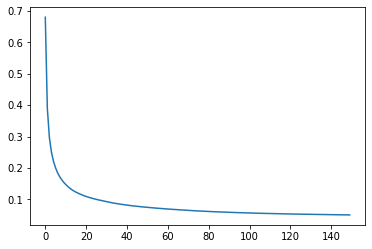

In [73]:
plt.plot(loss_list)

In [74]:
#making prediction
def predict(x):
    z1 = x.dot(params['W1'])+ params['b1']
    A1 = relu(z1)
    z2 = A1.dot(params['W2'])+ params['b2']
    y_hat= sigmoid(z2)
    return np.round(y_hat)
def accuracy(y,y_hat):
    acc = (np.sum(y== y_hat)/len(y))* 100
    return acc

In [75]:
pred = predict(x_train)
accuracy(y_train,pred)

98.21109123434705

In [76]:
preds = predict(x_test)
accuracy(y_test,preds)
    

92.85714285714286

# Neutral network using OOP

In [89]:
class NeutralNet():
    np.random.seed(3)
    
    
    def __init__(self,layers=[9,4,1],learning_rate= 0.001,iterations=100):
        self.layers = layers
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.params = {}
        self.cost = []
        self.x = None
        self.y = None
        
    def _init_weights(self):
        self.params['W1'] =  np.random.randn(self.layers[0],self.layers[1])
        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2])
        self.params['b1'] = np.random.rand(self.layers[1])
        self.params['b2'] = np.random.rand(self.layers[2])
        
    def _relu(self,z):
        return np.maximum(0,z)

    def _sigmoid(self,z):
        return 1.0 / (1.0 + np.exp(-z))
    
    def _drelu(self,x):
        x[x<=0] = 0
        x[x>0]  = 1
        return x
    
    def _binary_cross_entropy(y,y_hat):
        cost = -1/len(y) * (np.sum(np.multiply(np.log(y_hat),y) + np.multiply((1-y),np.log(1-y_hat)))) 
        return cost
    
    def _foward_propagation(self):
        z1 = self.x.dot(self.params['W1'])+ self.params['b1']
        A1 = relu(z1)
        z2 = A1.dot(self.params['W2'])+ self.params['b2']
        y_hat= sigmoid(z2)
        loss  = binary_cross_entropy(self.y,y_hat)
        
        #saved parameters
        
        self.params['z1'] = z1
        self.params['A1'] = A1
        self.params['z2'] = z2
        
        return y_hat , loss
    
    def _back_propagation(self,y_hat):
        dl_wrt_y_hat = -(np.divide(self.y,y_hat) - np.divide((1-self.y),(1-y_hat)))
        dl_wrt_z2 = dl_wrt_y_hat * (y_hat * (1-y_hat)) 
        dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
        dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2)
        
        
        dl_wrt_z1 = dl_wrt_A1 * self._drelu(self.params['z1'])
        dl_wrt_w1 = self.x.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1,axis=0)
        
        
         #update weights and biases
        self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
        self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
        self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
        self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2
        
        
    def fit(self,x,y):
        self.x=x
        self.y= y
        self._init_weights()
        
        for i in range(self.iterations):
            yhat,loss = self._foward_propagation()
            self.cost.append(loss)
            self._back_propagation(y_hat)
            
    def predict(self,x):
        z1 = x.dot(self.params['W1'])+ self.params['b1']
        A1 = relu(z1)
        z2 = A1.dot(self.params['W2'])+ self.params['b2']
        pred = sigmoid(z2)
        return np.round(pred)
    
    def accuracy(self,y,y_hat):
        acc = int (np.sum((y== y_hat)/len(y))* 100)
        return acc
        
    def plot_loss(self):
        plt.plot(self.cost)
        plt.title(f"Loss curve for {self.iterations} iterations")
        plt.xlabel("iterations")
        plt.ylabel("loss")
        plt.show()
            



In [90]:
net = NeutralNet()
net.fit(x_train,y_train)
pred = net.predict(x_test)
net.accuracy(pred,y_test)

88